In [21]:
library(gplots)
library(ggplot2)
library(ape)
library(phylolm);

In [22]:
#Treat SL as 0 and SM as 1
species = c('Trichechus_manatus','Equus_caballus','Canis_lupus','Spermophilus_dauricus','Ursus_maritimus','Pteropus_vampyrus','Elephantulus_edwardii','Sus_scrofa','Odocoileus_virginianus','Oryctolagus_cuniculus','Ovis_aries','Lemur_catta','Tupaia_chinensis','Enhydra_lutris','Felis_catus','Cavia_porcellus')
coneType = c(0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1)
traitF <- data.frame(species = species, coneType = coneType)
rownames(traitF) <- traitF$species
traitM <- as.matrix(traitF)
traitM

,species,coneType
Trichechus_manatus,Trichechus_manatus,0
Equus_caballus,Equus_caballus,0
Canis_lupus,Canis_lupus,1
Spermophilus_dauricus,Spermophilus_dauricus,1
Ursus_maritimus,Ursus_maritimus,0
Pteropus_vampyrus,Pteropus_vampyrus,1
Elephantulus_edwardii,Elephantulus_edwardii,0
Sus_scrofa,Sus_scrofa,0
Odocoileus_virginianus,Odocoileus_virginianus,1
Oryctolagus_cuniculus,Oryctolagus_cuniculus,1


In [23]:
zoonomiaPath = '/Users/tinaryu/brain_epigenetics/project/data/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree'
zoonomiaTree <- read.tree(file = zoonomiaPath)
removeSpecV <- setdiff(zoonomiaTree$tip.label,species)

zoonomiaTreeDrop <- drop.tip(zoonomiaTree,removeSpecV)
zoonomiaTreeDrop$tip.label

[1] "Trichechus_manatus"     "Elephantulus_edwardii"  "Oryctolagus_cuniculus" 
 [4] "Cavia_porcellus"        "Spermophilus_dauricus"  "Tupaia_chinensis"      
 [7] "Lemur_catta"            "Pteropus_vampyrus"      "Sus_scrofa"            
[10] "Odocoileus_virginianus" "Ovis_aries"             "Equus_caballus"        
[13] "Felis_catus"            "Canis_lupus"            "Ursus_maritimus"       
[16] "Enhydra_lutris"

In [24]:
#this may take a minute

pathPeak = '/Users/tinaryu/brain_epigenetics/project/data/PVALBpeakPredM.csv'
pathSpecies = '/Users/tinaryu/brain_epigenetics/project/data/PVALBspeciesNames.csv'

speciesInfoF <- read.csv(file=pathSpecies,stringsAsFactors=F,header=T);
peakInfoF <- read.csv(file=pathPeak,header=TRUE,stringsAsFactors=F);


In [25]:
#only keep the species with trait annotation for the peak table
rownames(peakInfoF) <- peakInfoF$X
peakInfoSubsetF = peakInfoF[,species,drop=FALSE]
peakInfoSubsetM = as.matrix(peakInfoSubsetF)
peakInfoSubsetM[1:5,]

,Trichechus_manatus,Equus_caballus,Canis_lupus,Spermophilus_dauricus,Ursus_maritimus,Pteropus_vampyrus,Elephantulus_edwardii,Sus_scrofa,Odocoileus_virginianus,Oryctolagus_cuniculus,Ovis_aries,Lemur_catta,Tupaia_chinensis,Enhydra_lutris,Felis_catus,Cavia_porcellus
hg38:chr1:827288-827789,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
hg38:chr1:1040588-1041089,0.895055,NA,0.518405,0.390866,NA,0.682248,0.871319,NA,0.559516,NA,0.215756,0.911516,NA,0.961269,0.493220,0.455625
hg38:chr1:3621082-3621583,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
hg38:chr1:41811932-41812433,NA,0.644939,0.296015,0.664783,0.521421,0.510147,NA,0.944567,0.856497,0.919934,0.887398,0.647122,0.927092,0.757543,0.446869,0.279199
hg38:chr5:135399013-135399514,0.913547,NA,0.726630,NA,NA,0.570771,0.372646,NA,0.704837,NA,0.462822,0.894753,0.686243,0.859151,NA,0.835531


In [26]:
#only keep the rows with no missing values 322000 rows -> 26000 rows
peakInfoSubsetOmitM <- as.matrix(na.omit(peakInfoSubsetF))
peakInfoSubsetOmitF <- as.data.frame(peakInfoSubsetOmitM)

In [27]:
########## Loop through the peaks and calculate dichromacy relationship with phylolm ###############
#This could take a few minutes

testPeaksV <- rownames(peakInfoSubsetOmitF);

loopPeaksV <- testPeaksV;

peakPhyloResultsF <- data.frame(peakId = loopPeaksV, pvalue=rep(NA,length(loopPeaksV)),correlation=rep(NA,length(loopPeaksV)),adjCorrelation=rep(NA,length(loopPeaksV)));

rownames(peakPhyloResultsF) <- peakPhyloResultsF$peakId


options(warn=-1)

for(curPeak in loopPeaksV) {
    traitFtmp <- traitF;
    traitFtmp$curPeak <- peakInfoSubsetOmitM[curPeak,];
    
    curLmFit = phylolm(curPeak~coneType,data=traitFtmp,phy=zoonomiaTreeDrop,model="BM");
    curLmFitSum <- summary(curLmFit)
    peakPhyloResultsF[curPeak,"pvalue"] <- curLmFitSum$coefficients["coneType","p.value"]
    peakPhyloResultsF[curPeak,"correlation"] <- curLmFitSum$r.squared
    peakPhyloResultsF[curPeak,"adjCorrelation"] <- curLmFitSum$adj.r.squared

} 

options(warn=0)


In [28]:
peakPhyloResults2F <- peakPhyloResultsF[order(peakPhyloResultsF$pvalue,decreasing=F),]

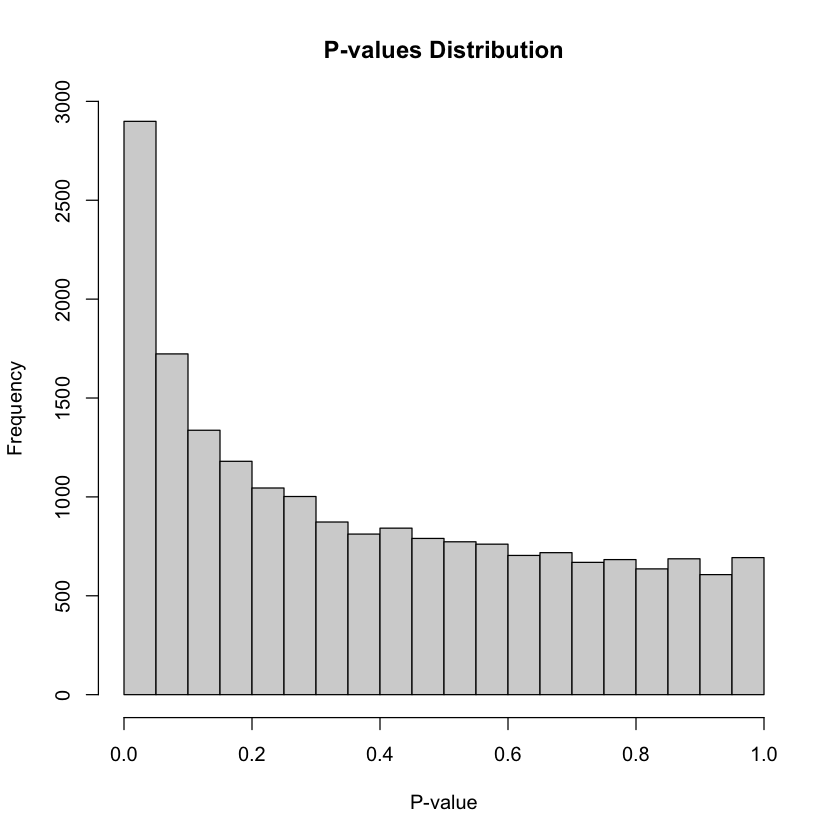

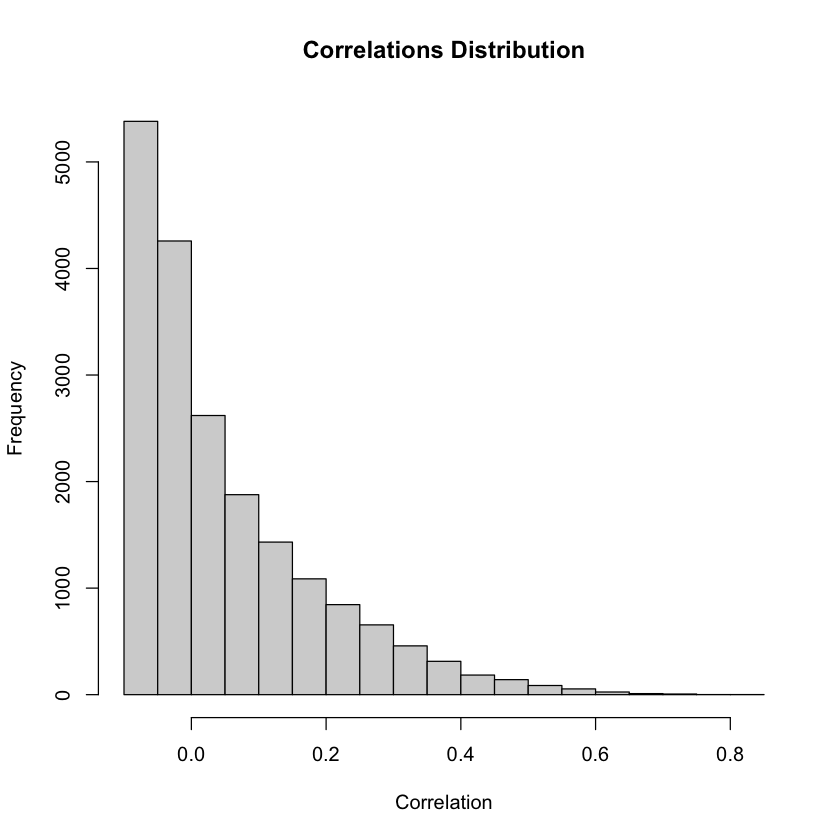

In [29]:
hist(peakPhyloResults2F$pvalue, main = "P-values Distribution", xlab = "P-value")
hist(peakPhyloResults2F$adjCorrelation, main = "Correlations Distribution", xlab = "Correlation")

### 2. What do those histograms tell you about the statistical tests you conduct?
There is a high number of peaks that are closely correlated with the trait with a low p-value, indicating that there is statistical power in the tests.

In [30]:
#add multiple testing correction
peakPhyloResults2F$adjPvalue <- p.adjust(peakPhyloResults2F$pvalue,method="BH")

#filter peaks to only keep the ones from the hg38 genome assembly
library(dplyr)
peakPhyloResultsFiltered2F <- peakPhyloResults2F %>% filter(grepl("hg38", peakId))

In [31]:
#save bed file of all hg38 peaks
library(dplyr)
library(tidyr)
# Split the peakId into separate columns for chrom, start, and end using tidyr::separate
Allpeaks <- peakPhyloResultsFiltered2F %>%
  separate(peakId, into = c("genome", "chrom", "position"), sep = ":") %>%
  separate(position, into = c("start", "end"), sep = "-", convert = TRUE)

# Create the BED file format (chrom, start, end)
bed_Allpeaks <- Allpeaks  %>%
  select(chrom, start, end)

write.table(bed_Allpeaks, "Results/PVALB/All.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

In [32]:
#filter peaks to positive and negative associations
peakPhyloResultsFilteredPositiveF <- peakPhyloResultsFiltered2F %>% filter(adjCorrelation>0)
peakPhyloResultsFilteredNegativeF <- peakPhyloResultsFiltered2F %>% filter(adjCorrelation<0)

write.csv(peakPhyloResultsFilteredPositiveF, file = "Results/PVALB/PhyloResultsHg38Positive.csv",row.names = FALSE)
write.csv(peakPhyloResultsFilteredNegativeF, file = "Results/PVALB/PhyloResultsHg38Negative.csv",row.names = FALSE)

#### 2. How many regions are significantly positively or significantly negatively associated at an adjusted p-value of <= 0.1?

In [33]:
NumSignificantPos <- sum(peakPhyloResultsFilteredPositiveF$adjPvalue < 0.1)
NumSignificantNeg <- sum(peakPhyloResultsFilteredNegativeF$adjPvalue < 0.1)
print(NumSignificantPos)
print(NumSignificantNeg)

[1] 7
[1] 0


7 regions are significantly positively associated with adjusted p-value of 0.1 and there are no significantly negatively associated regions.

### 3. For each cell type, find the peak that is most positively and most negatively associated with the trait (based on p-value).



In [34]:
#Get the most positively associated peak
TopPosPeak <- peakPhyloResultsFilteredPositiveF[1,'peakId']
TopNegPeak <- peakPhyloResultsFilteredNegativeF[1,'peakId']

In [35]:
peakInfoSubsetF[TopPosPeak,]

,Trichechus_manatus,Equus_caballus,Canis_lupus,Spermophilus_dauricus,Ursus_maritimus,Pteropus_vampyrus,Elephantulus_edwardii,Sus_scrofa,Odocoileus_virginianus,Oryctolagus_cuniculus,Ovis_aries,Lemur_catta,Tupaia_chinensis,Enhydra_lutris,Felis_catus,Cavia_porcellus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hg38:chr5:141879115-141879616,0.694396,0.861346,0.931503,0.929034,0.711067,0.869224,0.562979,0.499883,0.933007,0.935406,0.546492,0.469001,0.516027,0.662802,0.794601,0.765799


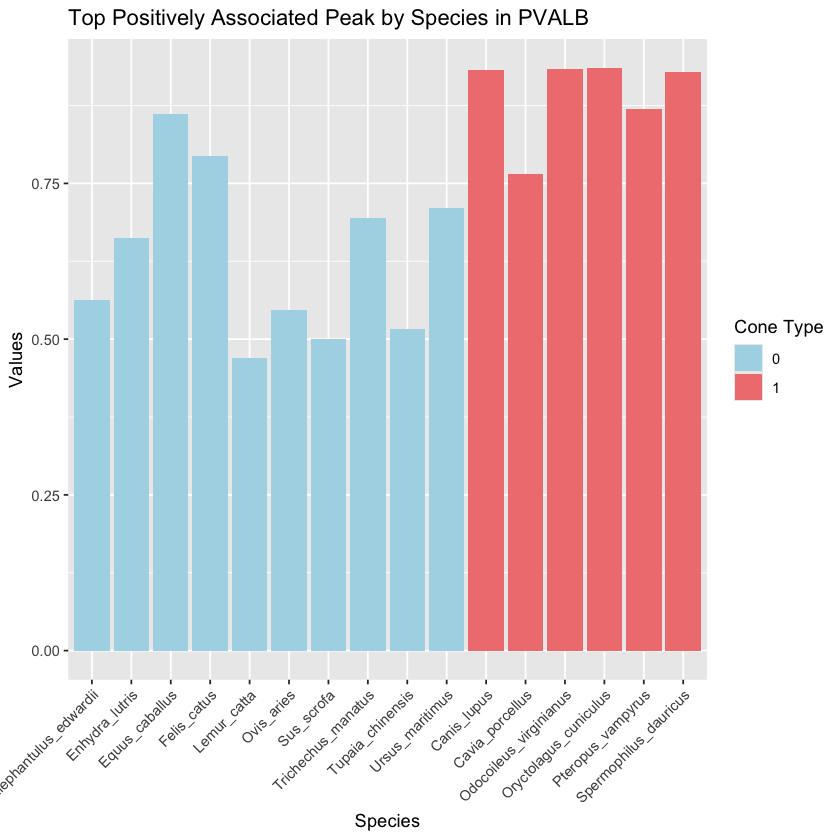

In [36]:
valuesPos <- as.numeric(peakInfoSubsetF[TopPosPeak, ])  # Convert to numeric vector if needed

# Create a new data frame with species, coneType, and extracted values
data <- data.frame(
  species = species,
  coneType = coneType,
  values = valuesPos
)

# Order species by coneType (0s on one side, 1s on the other)
data <- data[order(data$coneType, data$species), ]

# Plotting
library(ggplot2)

ggplot(data, aes(x = reorder(species, coneType), y = values, fill = factor(coneType))) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("0" = "lightblue", "1" = "lightcoral")) +
  labs(x = "Species", y = "Values", fill = "Cone Type") +
  ggtitle("Top Positively Associated Peak by Species in PVALB") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

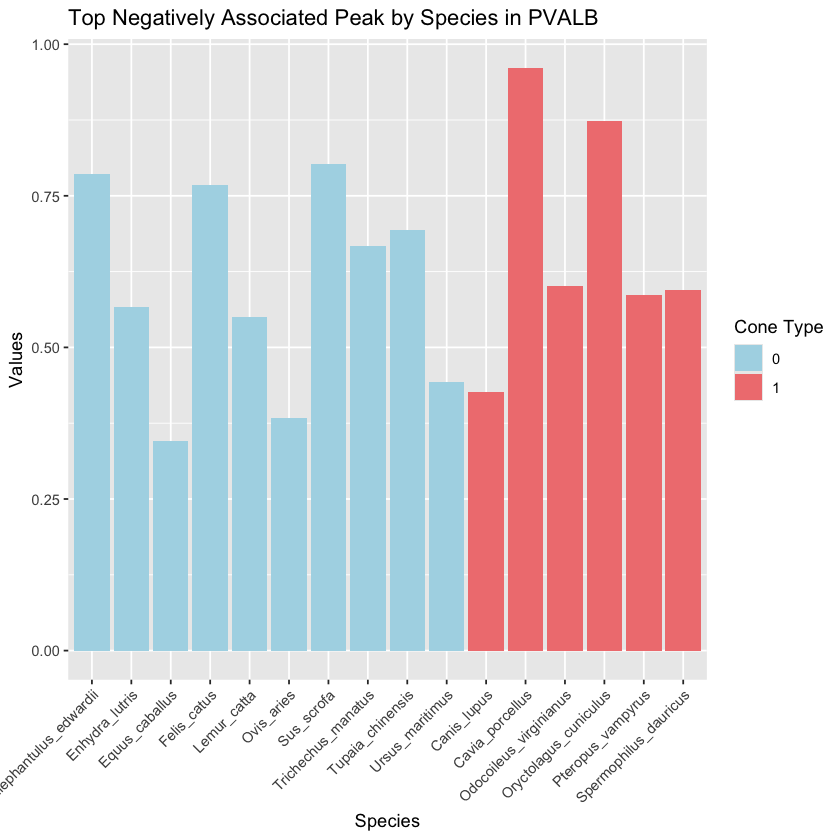

In [37]:
valuesNeg <- as.numeric(peakInfoSubsetF[TopNegPeak, ])  # Convert to numeric vector if needed

# Create a new data frame with species, coneType, and extracted values
data <- data.frame(
  species = species,
  coneType = coneType,
  values = valuesNeg
)

# Order species by coneType (0s on one side, 1s on the other)
data <- data[order(data$coneType, data$species), ]

# Plotting
library(ggplot2)

ggplot(data, aes(x = reorder(species, coneType), y = values, fill = factor(coneType))) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("0" = "lightblue", "1" = "lightcoral")) +
  labs(x = "Species", y = "Values", fill = "Cone Type") +
  ggtitle("Top Negatively Associated Peak by Species in PVALB") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### 4. Get Top 200 Peaks

In [38]:
top200Positive <- peakPhyloResultsFilteredPositiveF[1:200,]
top200Negative <- peakPhyloResultsFilteredNegativeF[1:200,]

In [39]:
# Load the necessary libraries
library(dplyr)
library(tidyr)

# Split the peakId into separate columns for chrom, start, and end using tidyr::separate
top200PositiveBed <- top200Positive %>%
  separate(peakId, into = c("genome", "chrom", "position"), sep = ":") %>%
  separate(position, into = c("start", "end"), sep = "-", convert = TRUE)

# Create the BED file format (chrom, start, end)
bed_data_pos <- top200PositiveBed  %>%
  select(chrom, start, end)

write.table(bed_data_pos, "Results/PVALB/Top200Pos.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

In [40]:
# Split the peakId into separate columns for chrom, start, and end using tidyr::separate
top200NegativeBed <- top200Negative %>%
  separate(peakId, into = c("genome", "chrom", "position"), sep = ":") %>%
  separate(position, into = c("start", "end"), sep = "-", convert = TRUE)

# Create the BED file format (chrom, start, end)
bed_data_neg <- top200NegativeBed  %>%
  select(chrom, start, end)

write.table(bed_data_neg, "Results/PVALB/Top200Neg.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)